In [38]:
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs
from geodatasets import get_path

path = get_path("naturalearth.land")
df = geopandas.read_file(path)

<Axes: >

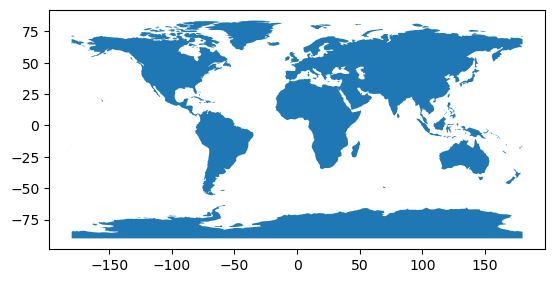

In [39]:
df.plot()

<Axes: >

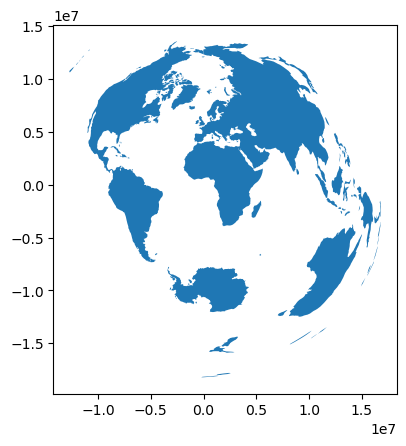

In [40]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

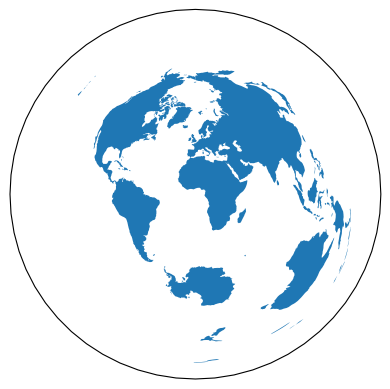

In [41]:
fig, ax = plt.subplots(subplot_kw={"projection": crs})
ax.add_geometries(df_ae["geometry"], crs=crs)

<GeoAxes: >

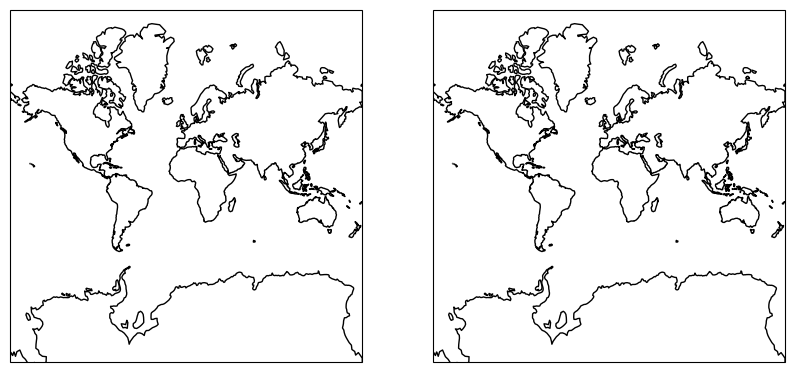

In [42]:
crs_epsg = ccrs.epsg("3857")
df_epsg = df.to_crs(epsg="3857")

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 2, subplot_kw={"projection": crs_epsg}, figsize=(10, 5))
# Make the CartoPy plot
axs[0].add_geometries(
    df_epsg["geometry"], crs=crs_epsg, facecolor="white", edgecolor="black"
)
# Make the GeoPandas plot
df_epsg.plot(ax=axs[1], color="white", edgecolor="black")

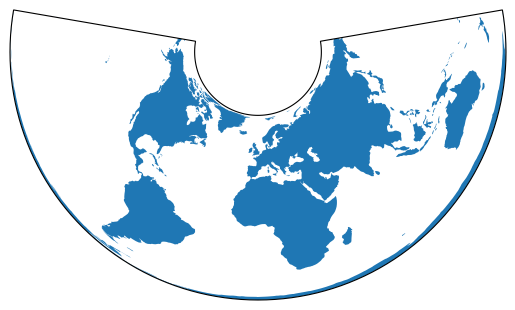

In [43]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [
    crs_new.project_geometry(ii, src_crs=crs) for ii in df_ae["geometry"].values
]

fig, ax = plt.subplots(subplot_kw={"projection": crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

<Axes: >

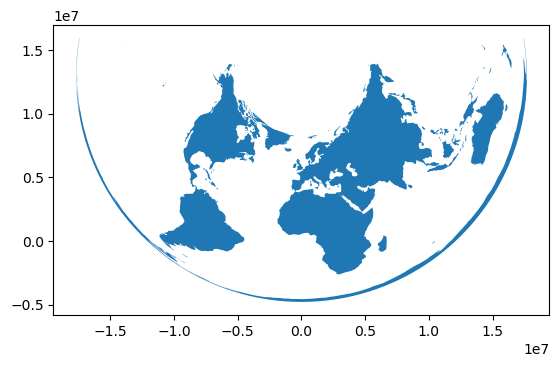

In [44]:
df_aea = geopandas.GeoDataFrame(
    df.drop(columns="geometry"), geometry=new_geometries, crs=crs_new.proj4_init
)
df_aea.plot()

c:\Users\maxke\atmos_py\.pixi\envs\default\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\maxke\atmos_py\.pixi\envs\default\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


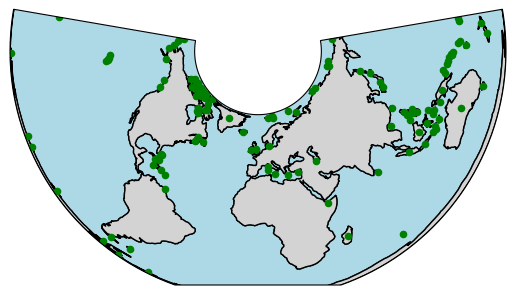

In [45]:
# Generate a CartoPy figure and add the countries to it
# Generate a CartoPy figure and add the countries to it
import cartopy.feature as cfeature
fig, ax = plt.subplots(subplot_kw={"projection": crs_new})
# Add ocean and land background colors
ax.add_feature(cfeature.OCEAN, facecolor="lightblue", zorder=0)
ax.add_feature(cfeature.LAND, facecolor="lightgrey", edgecolor="black", zorder=0)
# Draw the country geometries on top of the background
ax.add_geometries(new_geometries, crs=crs_new, facecolor="lightgrey", edgecolor="black", zorder=1)

# Calculate centroids and plot as green dots above polygons
df_aea_centroids = df_aea.geometry.centroid
df_aea_centroids.plot(ax=ax, markersize=20, color="green", zorder=2)

plt.show()